In [58]:
import operator
import random
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
from deap import gp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
import numpy as np
import pandas as pd
from functools import partial
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Reading the dataset

In [2]:
df = pd.read_csv(
    "./german.tsv",
    sep="\t",
    names=[
        "A0",
        "A1",
        "A2",
        "A3",
        "A4",
        "A5",
        "A6",
        "A7",
        "A8",
        "A9",
        "A10",
        "A11",
        "A12",
        "A13",
        "A14",
        "A15",
        "A16",
        "A17",
        "A18",
        "A19",
        "A20",
        "A21",
        "A22",
        "A23",
        "target",
    ],
)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A0      1000 non-null   int64
 1   A1      1000 non-null   int64
 2   A2      1000 non-null   int64
 3   A3      1000 non-null   int64
 4   A4      1000 non-null   int64
 5   A5      1000 non-null   int64
 6   A6      1000 non-null   int64
 7   A7      1000 non-null   int64
 8   A8      1000 non-null   int64
 9   A9      1000 non-null   int64
 10  A10     1000 non-null   int64
 11  A11     1000 non-null   int64
 12  A12     1000 non-null   int64
 13  A13     1000 non-null   int64
 14  A14     1000 non-null   int64
 15  A15     1000 non-null   int64
 16  A16     1000 non-null   int64
 17  A17     1000 non-null   int64
 18  A18     1000 non-null   int64
 19  A19     1000 non-null   int64
 20  A20     1000 non-null   int64
 21  A21     1000 non-null   int64
 22  A22     1000 non-null   int64
 23  A23     1000 n

In [5]:
df.columns

Index(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'target'],
      dtype='object')

In [3]:
X = df.iloc[:, :-1]
X = X.astype(np.float64)
y = df.iloc[:, -1]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A0      1000 non-null   float64
 1   A1      1000 non-null   float64
 2   A2      1000 non-null   float64
 3   A3      1000 non-null   float64
 4   A4      1000 non-null   float64
 5   A5      1000 non-null   float64
 6   A6      1000 non-null   float64
 7   A7      1000 non-null   float64
 8   A8      1000 non-null   float64
 9   A9      1000 non-null   float64
 10  A10     1000 non-null   float64
 11  A11     1000 non-null   float64
 12  A12     1000 non-null   float64
 13  A13     1000 non-null   float64
 14  A14     1000 non-null   float64
 15  A15     1000 non-null   float64
 16  A16     1000 non-null   float64
 17  A17     1000 non-null   float64
 18  A18     1000 non-null   float64
 19  A19     1000 non-null   float64
 20  A20     1000 non-null   float64
 21  A21     1000 non-null   float64
 22  A

In [7]:
X.columns

Index(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23'],
      dtype='object')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
print(X_train.shape, X_test.shape)

(750, 24) (250, 24)


In [11]:
print(y_train.shape, y_test.shape)

(750,) (250,)


In [30]:
def protected_div(left, right):
    if right != 0:
        return np.float64(left / right)
    else:
        return np.float64(1)

In [18]:
def individual_create():
    """
    00 tree_type - ARITHMETIC, LOGICAL, DECISION
    01 pop_size - 100, 200, 300
    02 tree_gen_method - FULL, GROW, HALF_AND_HALF
    03 initial_depth- [2, 15] [2, 8] for decision trees
    04 offspring_depth - [2, 15] [2, 8] for decision trees
    05 selection_method = FITNESS_PROP, TOURNAMENT
    06 selection_size - [2, 10]
    07 reproduction_rate - [0, 100]
    08 mut_type - GROW, SHRINK
    09 max_mut_depth - [2, 6]
    10 control_flow - FIXED, RANDOM
    11 op_combination - [0, 6] CX_MUT, CX, MUT, CX_MUT_PRESET, MUT_RAND_CX, CX_RAND_MUT, CREATE
    12 fitness_type - [0, 4] ACC, F_SCORE, W_ACC, RAND_W_ACC, TPR
    13 nr_gen - [50, 200]
    """
    tmp = np.empty(14, dtype=int)
    # TODO do decision tree later
    # change this to (0, 2)
    tmp[0] = random.randint(0, 1)
    tmp[1] = random.choice([100, 200, 300])
    tmp[2] = random.randint(0, 2)
    if tmp[0] == 2:
        tmp[3] = random.randint(2, 8)
        tmp[4] = random.randint(2, 8)
    else:
        tmp[3] = random.randint(2, 15)
        tmp[4] = random.randint(2, 15)
    tmp[5] = random.randint(0, 1)
    tmp[6] = random.randint(2, 10)
    tmp[7] = random.randint(0, 100)
    tmp[8] = random.randint(0, 1)
    tmp[9] = random.randint(2, 6)
    tmp[10] = random.randint(0, 1)
    tmp[11] = random.randint(0, 6)
    tmp[12] = random.randint(0, 4)
    tmp[13] = random.randint(50, 200)
    return tmp

In [35]:
def eaSimple(
    population,
    toolbox,
    cxpb,
    mutpb,
    ngen,
    stats=None,
    halloffame=None,
    verbose=__debug__,
    use_varAnd=True,
):
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Vary the pool of individuals
        if use_varAnd:
            offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)
        else:
            offspring = algorithms.varOr(
                offspring, toolbox, len(offspring), cxpb, mutpb
            )

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [80]:
def inner_evaluate(individual, tree_type, fitness_type, toolbox):
    func = toolbox.compile(expr=individual)
    y_pred = [func(*data) for _, data in X_train.iterrows()]
    y_labels = np.unique(y)
    # Output of arithmetic trees is float
    if tree_type == 0:
        y_pred = list(map(lambda x: y_labels[0] if x > 0 else y_labels[1], y_pred))
    elif tree_type == 1:
        y_pred = list(map(lambda x: y_labels[0] if x else y_labels[1], y_pred))
    else:
        raise ValueError("tree_type should be in [0, 2]")

    if fitness_type == 0:
        ret =  accuracy_score(y_true=y_train, y_pred=y_pred)
    elif fitness_type == 1:
        ret =  f1_score(y_train, y_pred)
    elif fitness_type == 2:
        ret =  (accuracy_score(y_train, y_pred) + f1_score(y_train, y_pred)) / 2
    elif fitness_type == 3:
        tmp = random.random()
        ret =  tmp * accuracy_score(y_train, y_pred) + (1 - tmp) * f1_score(
            y_train, y_pred
        )
    elif fitness_type == 4:
        ret =  recall_score(y_train, y_pred)
    return ret,

In [234]:
pset = gp.PrimitiveSetTyped("main", [type(X[col][0]) for col in X_train], np.float64, "IN")

In [235]:
pset.addPrimitive(operator.add, [np.float64, np.float64], np.float64)
pset.addPrimitive(operator.sub, [np.float64, np.float64], np.float64)
pset.addPrimitive(operator.mul, [np.float64, np.float64], np.float64)
pset.addPrimitive(protected_div, [np.float64, np.float64], np.float64)

In [236]:
# Add this constant to prevent no primitive found error
# This occurs because there may be an odd number of inputs and all the functions are binary
pset.addEphemeralConstant(name="RAND", ephemeral=partial(np.float64, random.random()), ret_type=np.float64)

In [237]:
creator.create("InnerFitnessMax", base.Fitness, weights=(1.0,))
creator.create("InnerIndividual", gp.PrimitiveTree, fitness=creator.InnerFitnessMax)

/Users/deebakkarthi/.local/share/conda/envs/autoGA/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'InnerFitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/deebakkarthi/.local/share/conda/envs/autoGA/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'InnerIndividual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [238]:
toolbox = base.Toolbox()

In [243]:
individual = individual_create()

In [244]:
individual

array([  0, 100,   0,  14,   6,   1,   7,  32,   0,   5,   1,   1,   0,
        89])

In [245]:
if individual[2] == 0:
    toolbox.register("expr", gp.genFull, pset=pset, min_=2, max_=individual[3])
elif individual[2] == 1:
    toolbox.register("expr", gp.genGrow, pset=pset, min_=2, max_=individual[3])
elif individual[2] == 2:
    toolbox.register(
        "expr", gp.genHalfAndHalf, pset=pset, min_=2, max_=individual[3]
    )
else:
    raise ValueError("tree_gen_method should be from [0, 1, 2]")

In [246]:
toolbox.register("individual", tools.initIterate, creator.InnerIndividual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [247]:
toolbox.register(
    "evaluate",
    inner_evaluate,
    fitness_type=individual[12],
    toolbox=toolbox,
    tree_type=individual[0],
)
if individual[5] == 0:
    toolbox.register("select", tools.selRoulette)
elif individual[5] == 1:
    toolbox.register("select", tools.selTournament, tournsize=individual[6])
else:
    raise ValueError("selection_method should be from [0, 1]")

toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=2, max_=individual[9])

if individual[8] == 0:
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
elif individual[8] == 1:
    toolbox.register("mutate", gp.mutShrink)
else:
    raise ValueError("mut_type should be from [0, 1]")

use_varAnd = True
if individual[11] == 0:
    cxpb = individual[7]
    mutpb = 100 - cxpb
    mutpb = float(mutpb / 100)
    cxpb = float(cxpb / 100)
elif individual[11] == 1:
    cxpb = 1
    mutpb = 0
elif individual[11] == 2:
    cxpb = 0
    mutpb = 1
elif individual[11] == 3:
    cxpb = random.choice([10, 20, 30, 40, 50, 60, 70, 80, 90])
    mutpb = 100 - cxpb
    mutpb = float(mutpb / 100)
    cxpb = float(cxpb / 100)
elif individual[11] == 4:
    cxpb = random.random()
    mutpb = 1
elif individual[11] == 5:
    cxpb = 1
    mutpb = random.random()
elif individual[11] == 6:
    cxpb = 0
    mutpb = 0
    use_varAnd = False
else:
    raise ValueError("op_combination should be in [0, 6]")

In [248]:
pop = toolbox.population(n=individual[1])

In [249]:
hof = tools.HallOfFame(1)

In [250]:
stats = tools.Statistics(lambda ind: ind.fitness.values)

In [251]:
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [252]:
pop, log = algorithms.eaSimple(
    pop,
    toolbox,
    cxpb=0.5,
    mutpb=0.2,
    ngen=50,
    stats=stats,
    halloffame=hof,
    verbose=True,
)

gen	nevals	avg     	std     	min  	max     
0  	100   	0.491013	0.104752	0.308	0.697333
1  	68    	0.612173	0.0777798	0.316	0.697333
2  	72    	0.66212 	0.0714381	0.365333	0.698667
3  	50    	0.675027	0.0723114	0.316   	0.713333
4  	64    	0.697413	0.0155043	0.569333	0.716   
5  	67    	0.690347	0.0619012	0.376   	0.716   
6  	51    	0.71272 	0.00495462	0.686667	0.716   
7  	62    	0.7078  	0.0424576 	0.341333	0.718667
8  	57    	0.710893	0.0269802 	0.474667	0.721333
9  	62    	0.711867	0.0293482 	0.492   	0.722667
10 	55    	0.716373	0.00881026	0.674667	0.722667
11 	59    	0.705467	0.0534038 	0.334667	0.724   
12 	65    	0.714893	0.0246966 	0.506667	0.726667
13 	55    	0.717653	0.0183246 	0.573333	0.726667
14 	53    	0.714933	0.0459197 	0.308   	0.728   
15 	55    	0.723667	0.00792044	0.673333	0.729333
16 	63    	0.717587	0.0363634 	0.437333	0.730667
17 	69    	0.72052 	0.0369922 	0.364   	0.730667
18 	57    	0.71476 	0.052485  	0.342667	0.730667
19 	68    	0.723507	0.0284857 	0.47066

In [253]:
log

[{'gen': 0,
  'nevals': 100,
  'avg': 0.4910133333333334,
  'std': 0.10475191772309789,
  'min': 0.308,
  'max': 0.6973333333333334},
 {'gen': 1,
  'nevals': 68,
  'avg': 0.6121733333333335,
  'std': 0.07777978143450906,
  'min': 0.316,
  'max': 0.6973333333333334},
 {'gen': 2,
  'nevals': 72,
  'avg': 0.66212,
  'std': 0.07143807761504599,
  'min': 0.36533333333333334,
  'max': 0.6986666666666667},
 {'gen': 3,
  'nevals': 50,
  'avg': 0.6750266666666666,
  'std': 0.07231138960541877,
  'min': 0.316,
  'max': 0.7133333333333334},
 {'gen': 4,
  'nevals': 64,
  'avg': 0.6974133333333333,
  'std': 0.015504344910737475,
  'min': 0.5693333333333334,
  'max': 0.716},
 {'gen': 5,
  'nevals': 67,
  'avg': 0.6903466666666668,
  'std': 0.06190117428432015,
  'min': 0.376,
  'max': 0.716},
 {'gen': 6,
  'nevals': 51,
  'avg': 0.7127199999999999,
  'std': 0.004954620738933173,
  'min': 0.6866666666666666,
  'max': 0.716},
 {'gen': 7,
  'nevals': 62,
  'avg': 0.7078,
  'std': 0.042457560509813135,


In [254]:
log[-1]

{'gen': 50,
 'nevals': 54,
 'avg': 0.7314533333333333,
 'std': 0.024404076162258915,
 'min': 0.5213333333333333,
 'max': 0.7386666666666667}

In [259]:
func = gp.compile(hof[0], pset)

In [261]:
toolbox.evaluate(hof[0])

(0.7386666666666667,)

In [276]:
y_pred = [func(*data) for _, data in X_train.iterrows()]

In [268]:
y_labels = y_train.unique()

In [278]:
y_labels

array([1, 2])

In [286]:
y_pred = list(map(lambda x: y_labels[0] if x > 0 else y_labels[1], y_pred))

In [285]:
len([x for x in y_pred if x >= 0])

669

In [284]:
len([x for x in y_pred if x < 0])

81

In [287]:
np.unique(y_pred)

array([1, 2])

In [289]:
print(classification_report(y_true=y_train, y_pred=y_pred))

              precision    recall  f1-score   support

           1       0.74      0.96      0.83       513
           2       0.75      0.26      0.38       237

    accuracy                           0.74       750
   macro avg       0.75      0.61      0.61       750
weighted avg       0.74      0.74      0.69       750



# Breast Cancer Dataset

In [12]:
df = pd.read_csv("./wdbc.data", header=None)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Dropping id
df.iloc[:, 1:].head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
X = df.iloc[:, 2:]

In [23]:
X.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       569 non-null    float64
 1   3       569 non-null    float64
 2   4       569 non-null    float64
 3   5       569 non-null    float64
 4   6       569 non-null    float64
 5   7       569 non-null    float64
 6   8       569 non-null    float64
 7   9       569 non-null    float64
 8   10      569 non-null    float64
 9   11      569 non-null    float64
 10  12      569 non-null    float64
 11  13      569 non-null    float64
 12  14      569 non-null    float64
 13  15      569 non-null    float64
 14  16      569 non-null    float64
 15  17      569 non-null    float64
 16  18      569 non-null    float64
 17  19      569 non-null    float64
 18  20      569 non-null    float64
 19  21      569 non-null    float64
 20  22      569 non-null    float64
 21  23      569 non-null    float64
 22  24

In [25]:
y = df.iloc[:, 1]

In [26]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: 1, dtype: object

In [27]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: 1
Non-Null Count  Dtype 
--------------  ----- 
569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


<Axes: xlabel='1'>

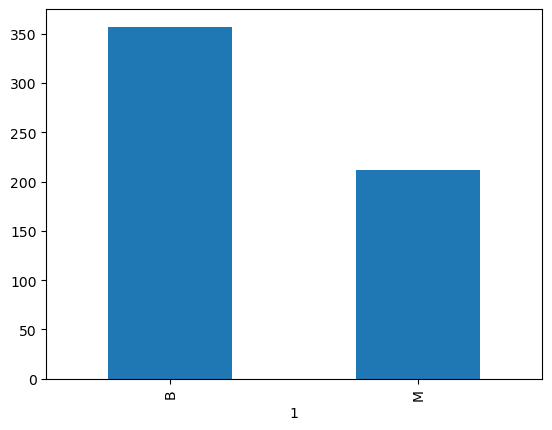

In [31]:
y.value_counts().plot(kind="bar")

In [59]:
le = LabelEncoder()

In [60]:
le.fit_transform(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [61]:
y = le.fit_transform(y)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       569 non-null    float64
 1   3       569 non-null    float64
 2   4       569 non-null    float64
 3   5       569 non-null    float64
 4   6       569 non-null    float64
 5   7       569 non-null    float64
 6   8       569 non-null    float64
 7   9       569 non-null    float64
 8   10      569 non-null    float64
 9   11      569 non-null    float64
 10  12      569 non-null    float64
 11  13      569 non-null    float64
 12  14      569 non-null    float64
 13  15      569 non-null    float64
 14  16      569 non-null    float64
 15  17      569 non-null    float64
 16  18      569 non-null    float64
 17  19      569 non-null    float64
 18  20      569 non-null    float64
 19  21      569 non-null    float64
 20  22      569 non-null    float64
 21  23      569 non-null    float64
 22  24

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [64]:
individual = [0, 100, 0, 7, 6, 1, 6, 89, 1, 5, 1, 2, 3, 200]

In [66]:
[type(X[col][0]) for col in X_train]

[numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64]

In [81]:
pset = gp.PrimitiveSetTyped("main", [type(X[col][0]) for col in X_train], np.float64, "IN")

In [82]:
def protected_div(left, right):
    if right != 0:
        return np.float64(left / right)
    else:
        return np.float64(1)
pset.addPrimitive(operator.add, [np.float64, np.float64], np.float64)
pset.addPrimitive(operator.sub, [np.float64, np.float64], np.float64)
pset.addPrimitive(operator.mul, [np.float64, np.float64], np.float64)
pset.addPrimitive(protected_div, [np.float64, np.float64], np.float64)

In [83]:
pset.addEphemeralConstant(name="RAND", ephemeral=partial(np.float64, random.random()), ret_type=np.float64)

In [84]:
creator.create("InnerFitnessMax", base.Fitness, weights=(1.0,))
creator.create("InnerIndividual", gp.PrimitiveTree, fitness=creator.InnerFitnessMax)

/Users/deebakkarthi/.local/share/conda/envs/autoGA/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'InnerFitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/deebakkarthi/.local/share/conda/envs/autoGA/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'InnerIndividual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [85]:
toolbox = base.Toolbox()

In [86]:
if individual[2] == 0:
    toolbox.register("expr", gp.genFull, pset=pset, min_=2, max_=individual[3])
elif individual[2] == 1:
    toolbox.register("expr", gp.genGrow, pset=pset, min_=2, max_=individual[3])
elif individual[2] == 2:
    toolbox.register(
        "expr", gp.genHalfAndHalf, pset=pset, min_=2, max_=individual[3]
    )
else:
    raise ValueError("tree_gen_method should be from [0, 1, 2]")

In [87]:
toolbox.register("individual", tools.initIterate, creator.InnerIndividual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [88]:
toolbox.register(
    "evaluate",
    inner_evaluate,
    fitness_type=individual[12],
    toolbox=toolbox,
    tree_type=individual[0],
)
if individual[5] == 0:
    toolbox.register("select", tools.selRoulette)
elif individual[5] == 1:
    toolbox.register("select", tools.selTournament, tournsize=individual[6])
else:
    raise ValueError("selection_method should be from [0, 1]")

toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=2, max_=individual[9])

if individual[8] == 0:
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
elif individual[8] == 1:
    toolbox.register("mutate", gp.mutShrink)
else:
    raise ValueError("mut_type should be from [0, 1]")

use_varAnd = True
if individual[11] == 0:
    cxpb = individual[7]
    mutpb = 100 - cxpb
    mutpb = float(mutpb / 100)
    cxpb = float(cxpb / 100)
elif individual[11] == 1:
    cxpb = 1
    mutpb = 0
elif individual[11] == 2:
    cxpb = 0
    mutpb = 1
elif individual[11] == 3:
    cxpb = random.choice([10, 20, 30, 40, 50, 60, 70, 80, 90])
    mutpb = 100 - cxpb
    mutpb = float(mutpb / 100)
    cxpb = float(cxpb / 100)
elif individual[11] == 4:
    cxpb = random.random()
    mutpb = 1
elif individual[11] == 5:
    cxpb = 1
    mutpb = random.random()
elif individual[11] == 6:
    cxpb = 0
    mutpb = 0
    use_varAnd = False
else:
    raise ValueError("op_combination should be in [0, 6]")

In [89]:
pop = toolbox.population(n=individual[1])

In [90]:
hof = tools.HallOfFame(1)

In [91]:
stats = tools.Statistics(lambda ind: ind.fitness.values)

In [92]:
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [94]:
pop, log = eaSimple(
    pop,
    toolbox,
    cxpb=0.5,
    mutpb=0.2,
    ngen=50,
    stats=stats,
    halloffame=hof,
    verbose=True,
    use_varAnd=use_varAnd
)

gen	nevals	avg     	std     	min       	max     
0  	0     	0.607119	0.328022	0.00263017	0.915138
1  	69    	0.63436 	0.316557	0.0404362 	0.915138
2  	66    	0.680531	0.299295	0.055573  	0.915138
3  	75    	0.654831	0.299443	0.00939842	0.915138
4  	60    	0.674715	0.304261	0.00522536	0.915138
5  	66    	0.65789 	0.310687	0.00482289	0.915138
6  	59    	0.747838	0.256554	0.0533593 	0.915138
7  	59    	0.689197	0.307355	0.0459282 	0.915138
8  	61    	0.683103	0.315191	0.03948   	0.915138
9  	57    	0.717328	0.269578	0.0329637 	0.915138
10 	54    	0.75555 	0.275468	0.00225742	0.915138
11 	51    	0.741106	0.277185	0.0608747 	0.915138
12 	61    	0.690961	0.296576	0.0429155 	0.915138
13 	67    	0.701789	0.30057 	0.0335066 	0.915138
14 	61    	0.710476	0.275652	0.00859583	0.915138
15 	50    	0.766104	0.242052	0.0287427 	0.916442
16 	63    	0.671071	0.31389 	0.00218208	0.916442
17 	65    	0.62175 	0.3174  	0.00101448	0.916442
18 	57    	0.710241	0.285952	0.0506072 	0.916442
19 	58    	0.703872	